**Problem Statement: Airbnb Hotel booking analysis.

The hospitality industry has undergone a significant transformation with the rise of online platforms facilitating short-term lodging and tourism. Leading this revolution is Airbnb, Inc., a pioneering American company that has reshaped travel accommodation through its innovative online marketplace. Established in 2008 in San Francisco, California, Airbnb provides a diverse range of lodging options, offering guests a unique and personalized experience. Unlike traditional hospitality providers, Airbnb operates on a commission-based model, facilitating transactions between hosts and guests without owning the properties listed on its platform.

This research analysis delves into the New York City Airbnb dataset to extract meaningful insights. Through rigorous data cleaning, exploratory analysis, and visualization techniques, the study aims to illuminate the dynamics of the city’s lodging market. By discerning factors influencing listing availability, pricing strategies, and overall customer satisfaction, the research contributes to a deeper understanding of Airbnb’s operations in one of the world’s most dynamic urban environments. These insights hold significance for stakeholders and enthusiasts seeking to navigate the evolving landscape of short-term accommodation.


QUESTIONS

This project is aimed to uncover some insights from the Airbnb Open Data. The following questions would be answered from the data.

What are the different property types in the Dataset?

Which neighborhood group has the highest number of listings?

Which neighborhoods group have the highest average prices for Airbnb listings?

Is there a relationship between the construction year of property and price?

Who are the top 10 hosts by calculated host listing count?

Are hosts with verified identities more likely to receive positive reviews?

Is there a correlation between the price of a listing and its service fee?

DATA WRAGLIG
Data wrangling (also called data cleaning or preprocessing) is the process of transforming raw data into a usable format for analysis. It involves handling missing values, correcting data types, dealing with duplicates, and making the dataset structured and ready for visualization or modeling.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

In [2]:
#read the airbnd data
df=pd.read_csv('/content/1730285881-Airbnb_Open_Data.csv',low_memory = False)


ACCESS THE DATA

In [3]:
df.head()

,id,NAME,host id,host_identity_verified,host name,neighbourhood group,neighbourhood,lat,long,country,...,service fee,minimum nights,number of reviews,last review,reviews per month,review rate number,calculated host listings count,availability 365,house_rules,license
0,1001254,Clean & quiet apt home by the park,80014485718,unconfirmed,Madaline,Brooklyn,Kensington,40.64749,-73.97237,United States,...,$193,10.0,9.0,19-10-2021,0.21,4.0,6.0,286.0,Clean up and treat the home the way you'd like...,NaN
1,1002102,Skylit Midtown Castle,52335172823,verified,Jenna,Manhattan,Midtown,40.75362,-73.98377,United States,...,$28,30.0,45.0,21-05-2022,0.38,4.0,2.0,228.0,Pet friendly but please confirm with me if the...,NaN
2,1002403,THE VILLAGE OF HARLEM....NEW YORK !,78829239556,NaN,Elise,Manhattan,Harlem,40.80902,-73.94190,United States,...,$124,3.0,0.0,NaN,NaN,5.0,1.0,352.0,"I encourage you to use my kitchen, cooking and...",NaN
3,1002755,NaN,85098326012,unconfirmed,Garry,Brooklyn,Clinton Hill,40.68514,-73.95976,United States,...,$74,30.0,270.0,05-07-2019,4.64,4.0,1.0,322.0,NaN,NaN
4,1003689,Entire Apt: Spacious Studio/Loft by central park,92037596077,verified,Lyndon,Manhattan,East Harlem,40.79851,-73.94399,United States,...,$41,10.0,9.0,19-11-2018,0.10,3.0,1.0,289.0,"Please no smoking in the house, porch or on th...",NaN


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 102599 entries, 0 to 102598
Data columns (total 26 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   id                              102599 non-null  int64  
 1   NAME                            102349 non-null  object 
 2   host id                         102599 non-null  int64  
 3   host_identity_verified          102310 non-null  object 
 4   host name                       102193 non-null  object 
 5   neighbourhood group             102570 non-null  object 
 6   neighbourhood                   102583 non-null  object 
 7   lat                             102591 non-null  float64
 8   long                            102591 non-null  float64
 9   country                         102067 non-null  object 
 10  country code                    102468 non-null  object 
 11  instant_bookable                102494 non-null  object 
 12  cancellation_pol

In [5]:
df.duplicated().value_counts()

,count
False,102058
True,541


In [15]:
print(df.columns.tolist())

# Step 4: Check datatypes of price and service fee
print(df['price_$'].dtype)
print(df['service_fee_$'].dtype)

['id', 'NAME', 'host id', 'host_identity_verified', 'host name', 'neighbourhood group', 'neighbourhood', 'lat', 'long', 'country', 'country code', 'instant_bookable', 'cancellation_policy', 'room type', 'Construction year', 'price_$', 'service_fee_$', 'minimum nights', 'number of reviews', 'last review', 'reviews per month', 'review rate number', 'calculated host listings count', 'availability 365']
float64
float64


In [16]:
#neighbour grp was 'brookln' insted of 'Brookyln'
df[df['neighbourhood group']=='brookln']

,id,NAME,host id,host_identity_verified,host name,neighbourhood group,neighbourhood,lat,long,country,...,Construction year,price_$,service_fee_$,minimum nights,number of reviews,last review,reviews per month,review rate number,calculated host listings count,availability 365
13,1008516,"Lovely Room 1, Garden, Best Area, Legal rental",26802410424,verified,Darcy,brookln,South Slope,40.66829,-73.98779,United States,...,2010,580.0,116.0,4.0,167.0,2019-06-24,1.34,4.0,3.0,47.0


Problems Identified within the Data

541 duplicated records were found in the data.

Insufficient information was recorded for the house_rules and licence columns.

Dollar signs and commas recorded along with the values for price and service fee.

The currency for price and service fee were not added to the column’s titles.

Missing values in some records.

Columns like price, service fee, id, host id, last review, construction year are assigned wrong datatypes.

In the neighbourhood group column the spelling of ‘Brooklyn’ was misspelt in some records.

Some outliers were identified in the availability 365 column.

CLEAN THE DATA

Steps to be Taken for Data Cleaning

Drop duplicated records.

Drop house_rules and licence columns with insufficient data.

Remove all dollar signs in the price and service fee columns.

Remove all commas from the price and service fee columns.

Rename the price and service fee columns to include dollar signs.

Drop all records with missing values.

Change all mismatched data types to the appropriate ones.

Correct the spelling of ‘Brooklyn’.

In [21]:
# Drop unwanted columns
df.drop(['house_rules','license'], axis=1, inplace=True, errors='ignore')

# Clean price_$ only if it's a string column
if df['price_$'].dtype == 'object':
    df['price_$'] = (df['price_$']
                     .str.replace('$', '', regex=False)
                     .str.replace(',', '', regex=False))
df['price_$'] = pd.to_numeric(df['price_$'], errors='coerce')

# Clean service_fee_$ only if it's a string column
if df['service_fee_$'].dtype == 'object':
    df['service_fee_$'] = (df['service_fee_$']
                           .str.replace('$', '', regex=False)
                           .str.replace(',', '', regex=False))
df['service_fee_$'] = pd.to_numeric(df['service_fee_$'], errors='coerce')

# Drop NAs
df.dropna(inplace=True)

# Fix column types
df['id'] = df['id'].astype(str)
df['host id'] = df['host id'].astype(str)
df['last review'] = pd.to_datetime(df['last review'])
df['Construction year'] = df['Construction year'].astype(int)

# Fix neighborhood typo
df.loc[df['neighbourhood group']=='brookln', 'neighbourhood group'] = 'Brookyln'

# Remove invalid availability values
df = df.drop(df[df['availability 365'] > 500].index)


In [22]:
df.duplicated().value_counts()

,count
False,83411


In [23]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 83411 entries, 0 to 102040
Data columns (total 24 columns):
 #   Column                          Non-Null Count  Dtype         
---  ------                          --------------  -----         
 0   id                              83411 non-null  object        
 1   NAME                            83411 non-null  object        
 2   host id                         83411 non-null  object        
 3   host_identity_verified          83411 non-null  object        
 4   host name                       83411 non-null  object        
 5   neighbourhood group             83411 non-null  object        
 6   neighbourhood                   83411 non-null  object        
 7   lat                             83411 non-null  float64       
 8   long                            83411 non-null  float64       
 9   country                         83411 non-null  object        
 10  country code                    83411 non-null  object        
 11  instan

EXPLORATORY DATA ANALYSIS(EDA)
EDA → Exploratory Data Analysis

A process in data science / machine learning.

It means analyzing datasets to summarize their main characteristics, often using statistics and visualization.

Example: checking distributions, missing values, correlations, and outliers.

Goal: to understand the data before applying models.

SUMMARY STATISTICS

In [24]:
df.describe()

,lat,long,Construction year,price_$,service_fee_$,minimum nights,number of reviews,last review,reviews per month,review rate number,calculated host listings count,availability 365
count,83411.000000,83411.000000,83411.000000,83411.000000,83411.000000,83411.000000,83411.000000,83411,83411.000000,83411.000000,83411.000000,83411.000000
mean,40.727353,-73.948500,2012.488509,626.212730,125.243709,7.405366,32.276642,2019-06-08 22:01:01.027922176,1.377584,3.278776,7.032682,141.742612
min,40.504560,-74.249840,2003.000000,50.000000,10.000000,-365.000000,1.000000,2012-07-11 00:00:00,0.010000,1.000000,1.000000,-10.000000
25%,40.687650,-73.982110,2007.000000,340.000000,68.000000,2.000000,3.000000,2018-10-26 00:00:00,0.220000,2.000000,1.000000,6.000000
50%,40.721320,-73.953720,2012.000000,625.000000,125.000000,3.000000,11.000000,2019-06-13 00:00:00,0.740000,3.000000,1.000000,101.000000
75%,40.762595,-73.930815,2017.000000,914.000000,183.000000,5.000000,38.000000,2019-07-05 00:00:00,2.010000,4.000000,2.000000,266.000000
max,40.916970,-73.705220,2022.000000,1200.000000,240.000000,5645.000000,1024.000000,2022-05-21 00:00:00,90.000000,5.000000,332.000000,426.000000
std,0.056324,0.050347,5.760870,331.787179,66.360979,28.102221,51.957777,NaN,1.751041,1.283599,29.551590,133.368399


What are the different property in the data

In [25]:
property_types=df['room type'].value_counts().to_frame()
property_types

,count
room type,
Entire home/apt,44163
Private room,37494
Shared room,1646
Hotel room,108


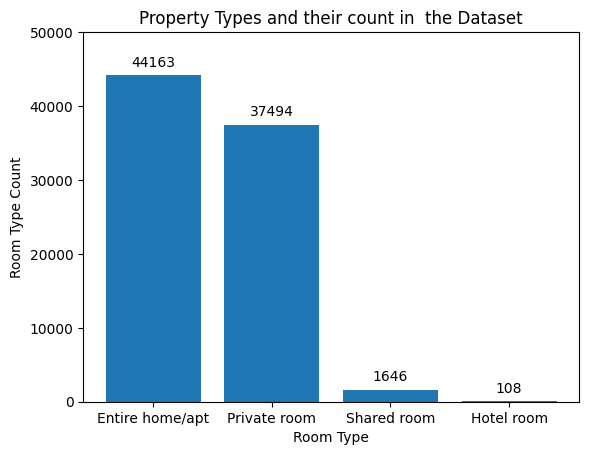

In [26]:
room_type_bar=plt.bar(property_types.index, property_types.loc[:,"count"]);
plt.bar_label(room_type_bar, labels=property_types.loc[:,"count"], padding=4);
plt.ylim([0,50000]);
plt.xlabel('Room Type');
plt.ylabel('Room Type Count');
plt.title('Property Types and their count in  the Dataset');


Which Neighbourhood group has heighest number of  listings?

In [27]:
hood_group=df['neighbourhood group'].value_counts().to_frame()
hood_group

,count
neighbourhood group,
Brooklyn,34635
Manhattan,34566
Queens,11126
Bronx,2267
Staten Island,816
Brookyln,1


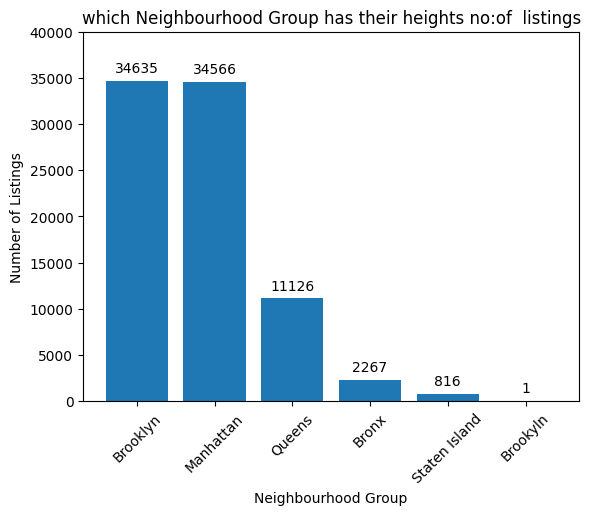

In [28]:
hood_group_bar=plt.bar(hood_group.index,hood_group.loc[:,"count"]);
plt.bar_label(hood_group_bar,labels=hood_group.loc[:,"count"],padding=4);
plt.ylim([0,40000]);
plt.xlabel('Neighbourhood Group');
plt.ylabel('Number of Listings');
plt.xticks(rotation=45)
plt.title('which Neighbourhood Group has their heights no:of  listings');

Which neighbourhodd groups have the heighest average prices for airbnb listings?

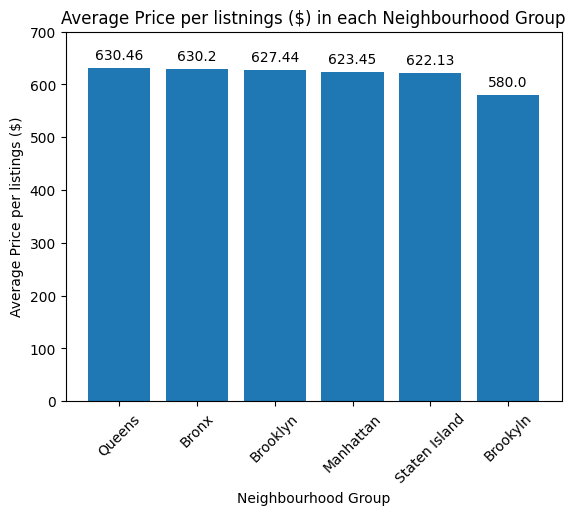

In [30]:
avg_prices=df.groupby('neighbourhood group')['price_$'].mean().sort_values(ascending=False).to_frame()
avg_prices_bar=plt.bar(avg_prices.index,avg_prices.loc[:,"price_$"]);
plt.bar_label(avg_prices_bar,labels= round(avg_prices.loc[:,"price_$"],2),label_type='edge',padding=4);
plt.ylim([0,700]);
plt.xlabel('Neighbourhood Group');
plt.ylabel('Average Price per listings ($)');
plt.xticks(rotation=45);
plt.title('Average Price per listnings ($) in each Neighbourhood Group');

Is there a realtion between construction year and prices?

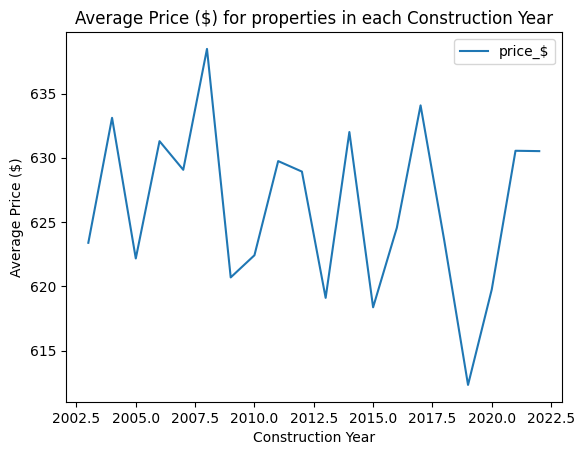

In [31]:
df.groupby(df['Construction year'])['price_$'].mean().to_frame().plot();
plt.xlabel('Construction Year');
plt.ylabel('Average Price ($)');
plt.title('Average Price ($) for properties in each Construction Year');

who are top 10 hosts by calculating host listing counts?

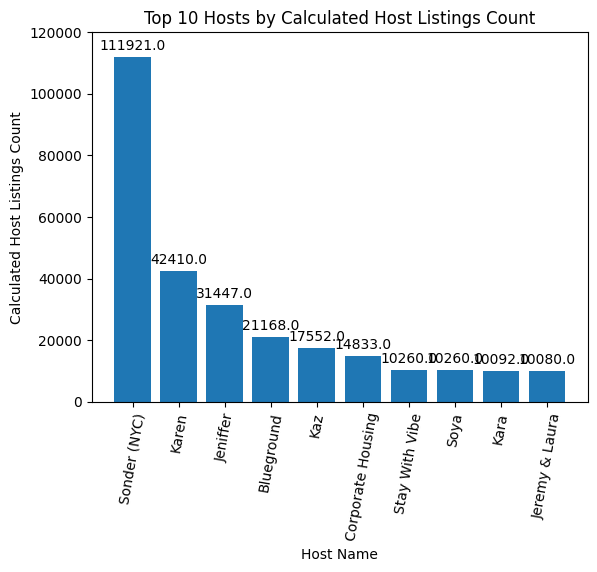

In [32]:
hosts=df.groupby('host name')['calculated host listings count'].sum().sort_values(ascending=False).nlargest(10).to_frame()
hosts_bar=plt.bar(hosts.index,hosts.loc[:,"calculated host listings count"]);
plt.bar_label(hosts_bar,labels=hosts.loc[:,"calculated host listings count"],label_type='edge',padding=3);
plt.xlabel('Host Name');
plt.ylabel('Calculated Host Listings Count');
plt.xticks(rotation=80);
plt.ylim([0,120000]);
plt.title('Top 10 Hosts by Calculated Host Listings Count');


Are hosts with verified identitites more likely to receive postive reviews?

In [34]:
review=df.groupby('host_identity_verified')['review rate number'].mean().sort_values(ascending=False).to_frame()
review

,review rate number
host_identity_verified,
verified,3.284186
unconfirmed,3.273370


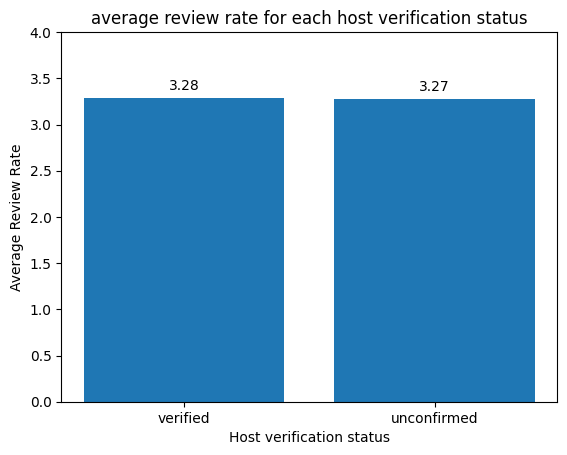

In [36]:
review_bar=plt.bar(review.index,review.loc[:,"review rate number"]);
plt.bar_label(review_bar,labels=round(review.loc[:,"review rate number"],2),padding=4);
plt.ylim([0,4]);
plt.xlabel('Host verification status');
plt.ylabel('Average Review Rate');
plt.title('average review rate for each host verification status');

is there is a correlation between the prices of a listings and its services?

In [40]:
df['price_$'].corr(df['service_fee_$'])

np.float64(0.9999909074778258)

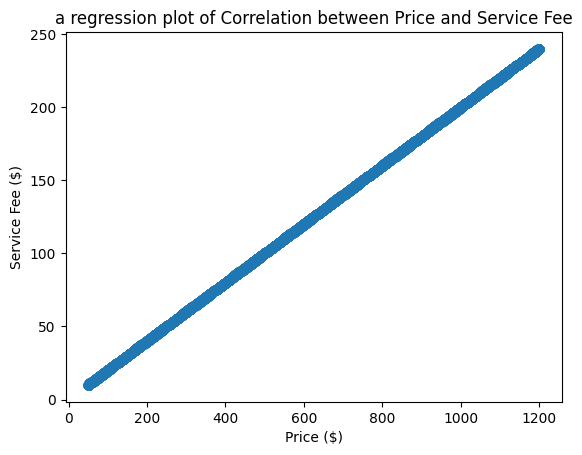

In [39]:
sns.regplot(x='price_$',y='service_fee_$',data=df);
plt.xlabel('Price ($)');
plt.ylabel('Service Fee ($)');
plt.title('a regression plot of Correlation between Price and Service Fee');

what is the average review rate number for listings,ans does it vary based on the neighbourhood group an roomtype?

In [41]:
ARRN=df.groupby(['neighbourhood group','room type'])['review rate number'].mean().to_frame()
ARRN

review rate number
neighbourhood group room type                          
Bronx               Entire home/apt            3.381881
                    Private room               3.305810
                    Shared room                3.356322
Brooklyn            Entire home/apt            3.242491
                    Hotel room                 3.833333
                    Private room               3.274860
                    Shared room                3.323383
Brookyln            Private room               4.000000
Manhattan           Entire home/apt            3.268846
                    Hotel room                 3.500000
                    Private room               3.285605
                    Shared room                3.261976
Queens              Entire home/apt            3.350045
                    Hotel room                 3.750000
                    Private room               3.310847
                    Shared room                3.327402
Staten Island       Entire home/apt            3.333333
                    Private room               3.497449
                    Shared room                3.714286

Text(0.5, 1.0, 'Average Review Rate for each room/property type in Neighbourhood Group and Room Type')

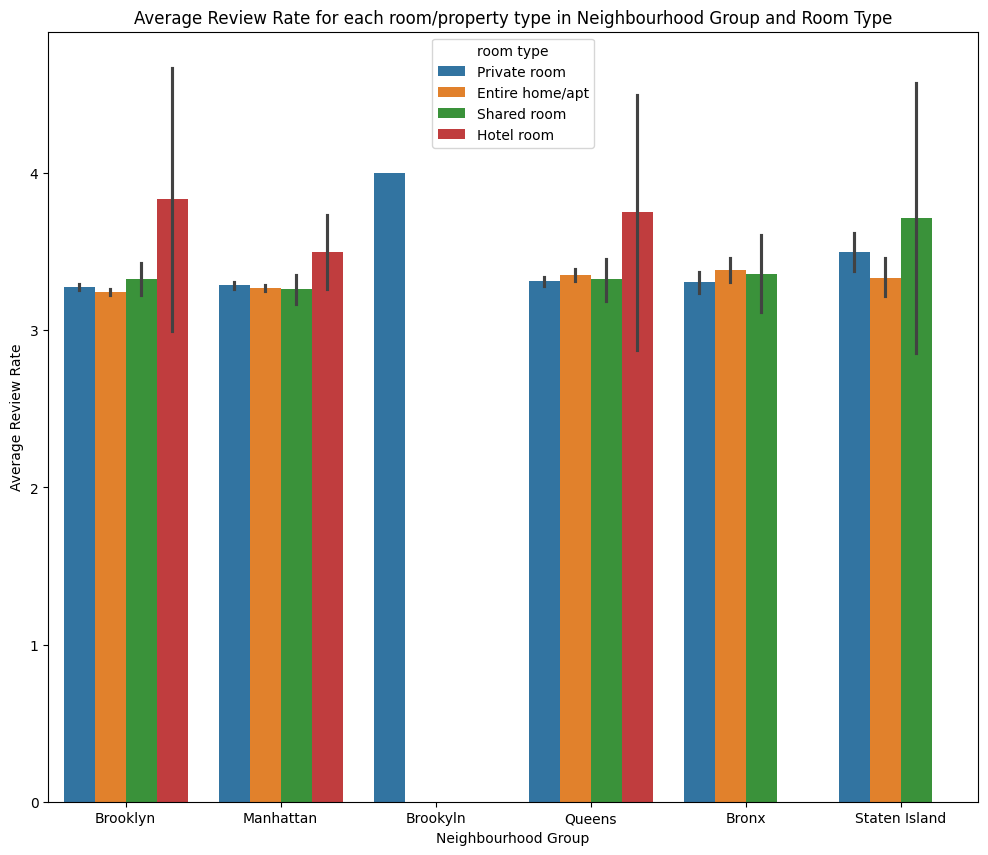

In [42]:
plt.figure(figsize=[12,10])
sns.barplot(data=df,x='neighbourhood group',y='review rate number',hue='room type');
plt.xlabel('Neighbourhood Group');
plt.ylabel('Average Review Rate');
plt.title('Average Review Rate for each room/property type in Neighbourhood Group and Room Type')

are hosts with a higher calculated host lietnings  count more likely to maintain higher availabilty throughtout the year?

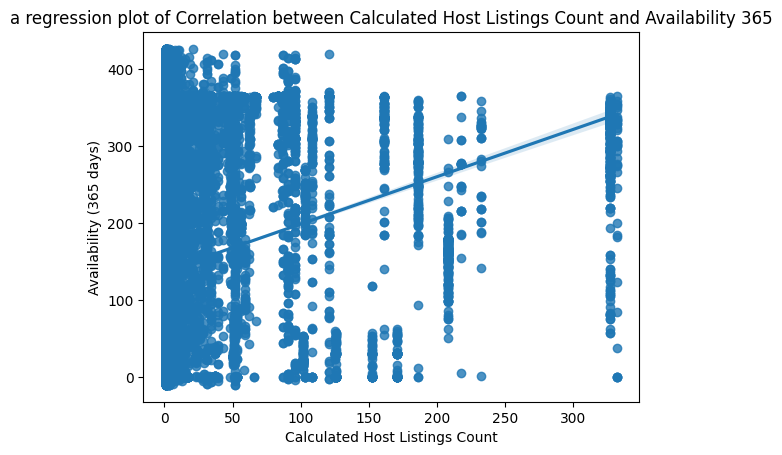

In [43]:
sns.regplot(df,x='calculated host listings count',y='availability 365');
plt.xlabel('Calculated Host Listings Count');
plt.ylabel('Availability (365 days)');
plt.title('a regression plot of Correlation between Calculated Host Listings Count and Availability 365');

In [44]:
df['calculated host listings count'].corr(df['availability 365'])

np.float64(0.1359855273675869)

the pearsons correraletion coefficient  for the association  between calculated host listenings and availabilty of 365

CONCLUSION
In conclusion, this project has provided a comprehensive analysis of the New York City Airbnb dataset, shedding light on various aspects of the short-term lodging market. Through data wrangling, exploratory data analysis (EDA), and interpretation of summary statistics, we’ve uncovered valuable insights into listing distribution, pricing dynamics, host, and review analysis.

Key findings include the dominance in counts of Entire home/apt listings, the variability in listing counts across neighborhood groups, and the downward trend between property construction year and price. Additionally, the analysis highlighted the significance of verified host status on review rates, as well as the strong correlation between listing price and service fee.

Furthermore, conducting sentiment analysis on guest reviews to understand factors driving customer satisfaction and preferences could inform targeted marketing strategies and product improvements for Airbnb. Lastly, expanding the analysis to include predictive modeling techniques, such as regression or machine learning algorithms, could enable forecasting of listing demand, pricing trends, and customer behavior, facilitating strategic decision-making for stakeholders in the short-term lodging industry.